In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [136]:
#a)	Import data 
df = pd.read_csv(r"C:\Users\Saeed\Desktop\walmart-sales-dataset-of-45stores.csv")
#b)	display data 
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [138]:
print(df.isna().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [139]:
print(df.duplicated().sum())

0


C:\Users\Saeed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saeed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saeed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saeed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

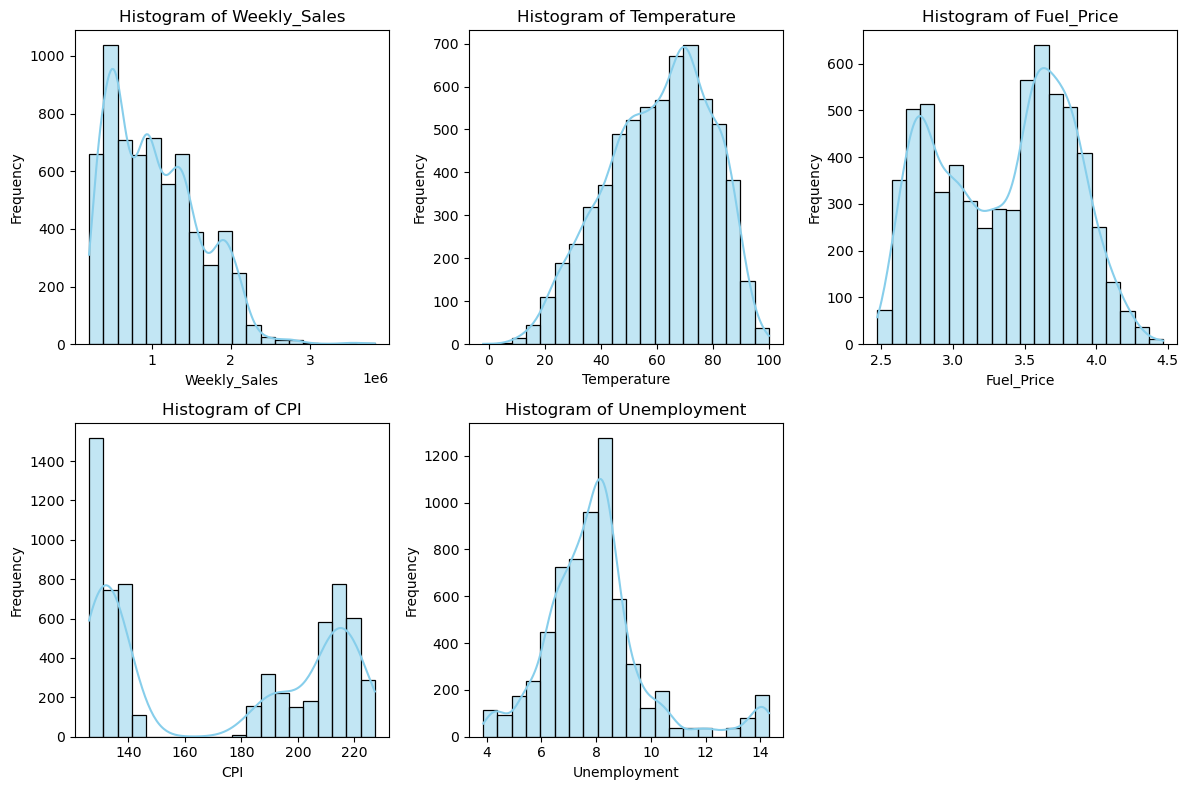

In [140]:
# visualize quantitative variables distributions :
quantitative_variables  = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(12, 8))
for i, variables  in enumerate(quantitative_variables ):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[variables ], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.xlabel(variables )
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {variables}')
plt.tight_layout()
plt.show()


In [154]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

Store 20 has the maximum sales : $301397792.46


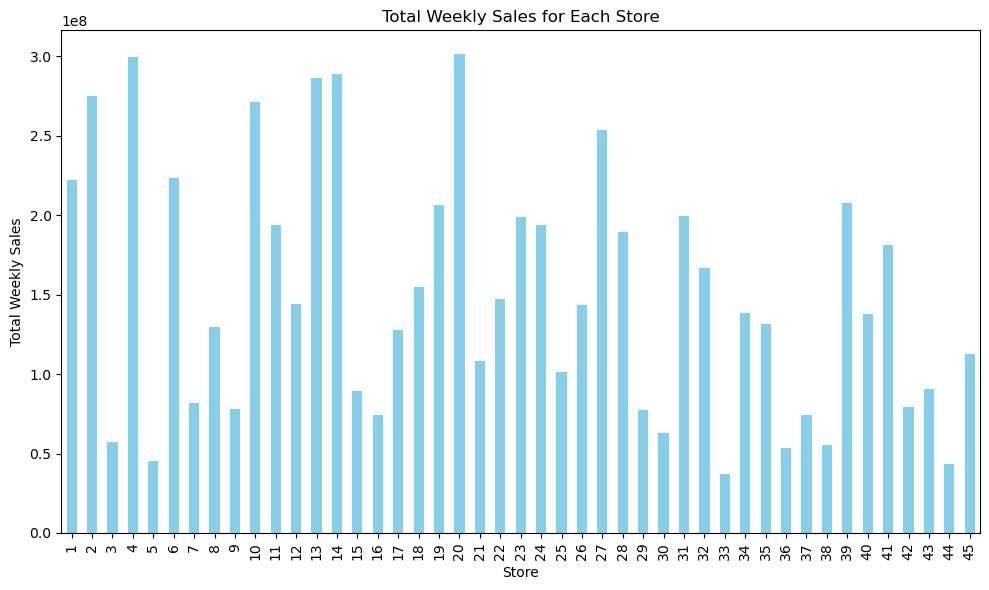

In [142]:
# a)Which store has maximum sales?

store = df.groupby('Store')['Weekly_Sales'].sum()
max_store = store.idxmax()
max_sales = store[max_store]
print(f"Store {max_store} has the maximum sales : ${max_sales:}")

# Plotting
plt.figure(figsize=(10, 6))
store.plot(kind='bar', color='skyblue')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales for Each Store')
plt.tight_layout()
plt.show()

Store 14 has the maximum standard deviation in sales : $317569.95


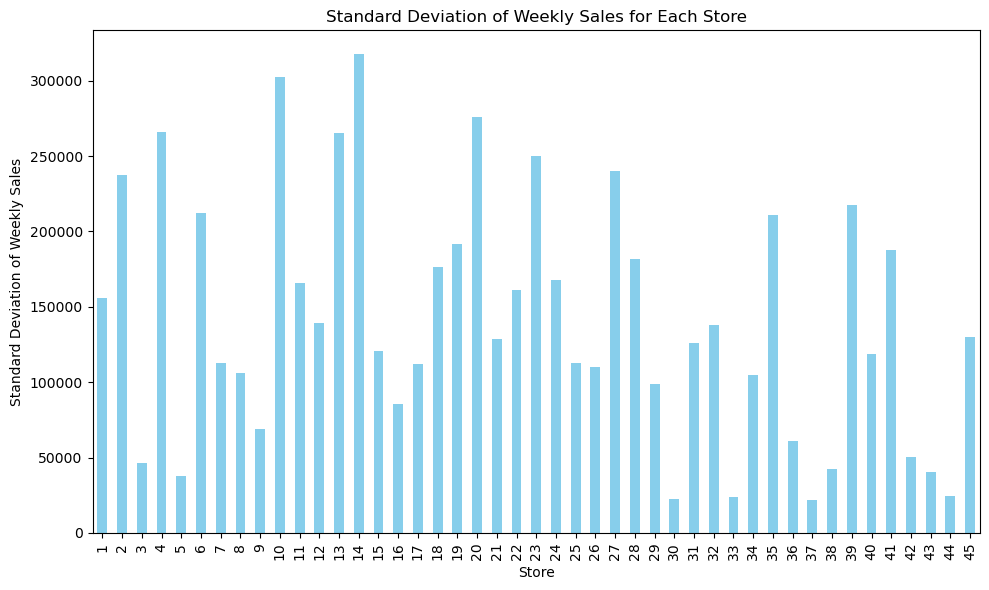

In [143]:
# b)Which store has maximum standard deviation i.e:

std = df.groupby('Store')['Weekly_Sales'].std()
max_store = std.idxmax()
max_std = std[max_store]
print(f"Store {max_store} has the maximum standard deviation in sales : ${max_std:.2f}")
# Plotting
plt.figure(figsize=(10, 6))
std.plot(kind='bar', color='skyblue')
plt.xlabel('Store')
plt.ylabel('Standard Deviation of Weekly Sales')
plt.title('Standard Deviation of Weekly Sales for Each Store')
plt.tight_layout()
plt.show()

Holidays with higher sales than mean sales in non-holiday season: ['2010-02-12' '2010-09-10' '2010-11-26' '2010-12-31' '2011-02-11'
 '2011-09-09' '2011-11-25' '2011-12-30' '2012-02-10' '2012-09-07']
mean_non_holiday_sales:1041256.38


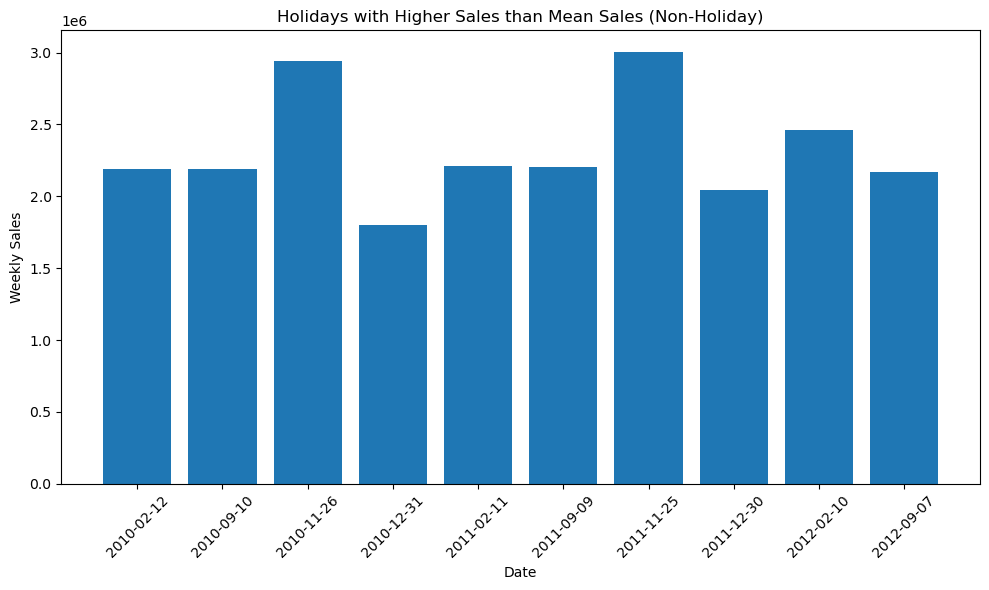

In [189]:
#c)	Some holidays have a negative impact on sales. 
#Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.

# Calculate mean sales in non-holiday season
mean_non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
print(f"mean_non_holiday_sales:{mean_non_holiday_sales:.2f}")

high_sales_holidays_df = df[(df['Holiday_Flag'] == 1) & (df['Weekly_Sales'] > mean_non_holiday_sales)]
print("Holidays with higher sales than mean sales in non-holiday season:", high_sales_holidays)


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(high_sales_holidays_df['Date'].dt.strftime('%Y-%m-%d'), high_sales_holidays_df['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Holidays with Higher Sales than Mean Sales (Non-Holiday)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Date
2010-02-28    1.903330e+08
2010-03-31    1.819198e+08
2010-04-30    2.314124e+08
2010-05-31    1.867109e+08
2010-06-30    1.922462e+08
2010-07-31    2.325801e+08
2010-08-31    1.876401e+08
2010-09-30    1.772679e+08
2010-10-31    2.171618e+08
2010-11-30    2.028534e+08
2010-12-31    2.887605e+08
2011-01-31    1.637040e+08
2011-02-28    1.863313e+08
2011-03-31    1.793564e+08
2011-04-30    2.265265e+08
2011-05-31    1.816482e+08
2011-06-30    1.897734e+08
2011-07-31    2.299114e+08
2011-08-31    1.885993e+08
2011-09-30    2.208477e+08
2011-10-31    1.832613e+08
2011-11-30    2.101624e+08
2011-12-31    2.880781e+08
2012-01-31    1.688945e+08
2012-02-29    1.920636e+08
2012-03-31    2.315097e+08
2012-04-30    1.889209e+08
2012-05-31    1.887665e+08
2012-06-30    2.406103e+08
2012-07-31    1.875095e+08
2012-08-31    2.368508e+08
2012-09-30    1.806455e+08
2012-10-31    1.843617e+08
Freq: M, Name: Weekly_Sales, dtype: float64


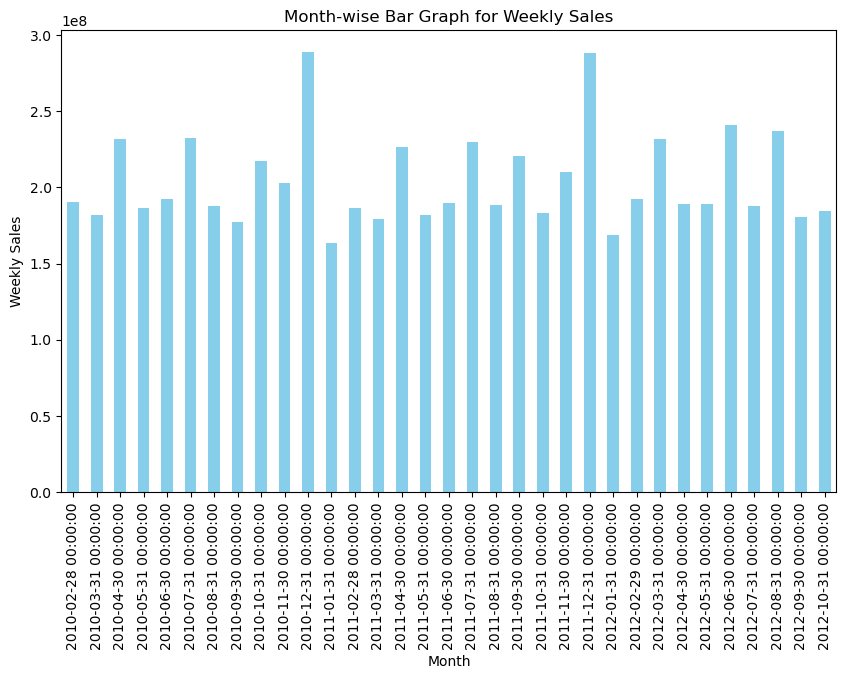

Date
2010-02-28    1.903330e+08
2010-06-30    7.922893e+08
2010-10-31    8.146500e+08
2011-02-28    8.416492e+08
2011-06-30    7.773045e+08
2011-10-31    8.226198e+08
2012-02-29    8.591985e+08
2012-06-30    8.498074e+08
2012-10-31    7.893674e+08
Freq: 4M, Name: Weekly_Sales, dtype: float64


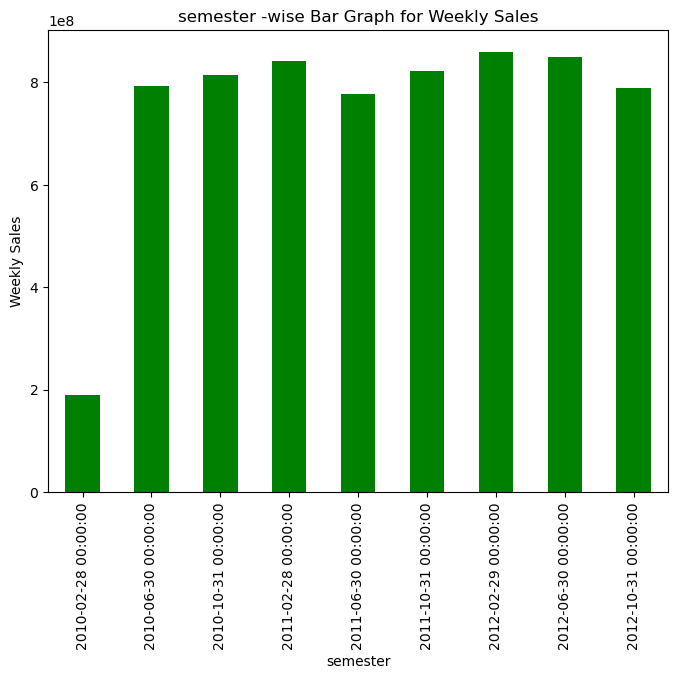

In [184]:
# d)Provide a monthly and semester view of sales in units and give insights.

# Group by month 
monthly_sales = df.resample('M', on='Date')['Weekly_Sales'].sum()
print(monthly_sales)
# Plot month bar graph 
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Month-wise Bar Graph for Weekly Sales')
plt.show()

# Group by semester 
semester_sales = df.resample('4M', on='Date')['Weekly_Sales'].sum()
print(semester_sales)

# Plotting
plt.figure(figsize=(8, 6))
yearly_sales.plot(kind='bar', color='green')
plt.xlabel('semester')
plt.ylabel('Weekly Sales')
plt.title('semester -wise Bar Graph for Weekly Sales')
plt.show()


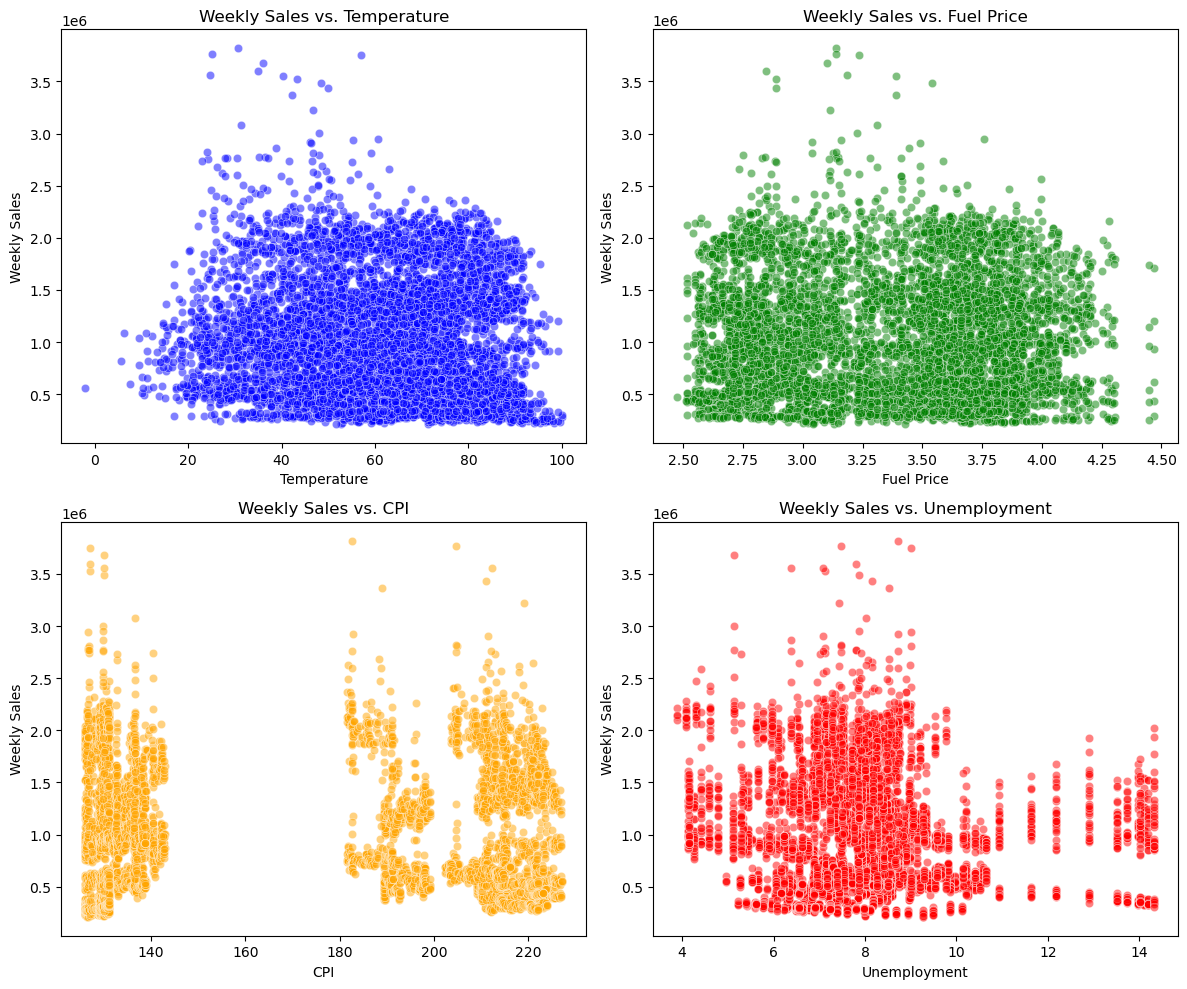

In [146]:
# Scatter plots of Weekly Sales vs. other numeric features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, color='blue', alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('Weekly Sales')
axes[0, 0].set_title('Weekly Sales vs. Temperature')

sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, color='green', alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_xlabel('Fuel Price')
axes[0, 1].set_ylabel('Weekly Sales')
axes[0, 1].set_title('Weekly Sales vs. Fuel Price')

sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, color='orange', alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_xlabel('CPI')
axes[1, 0].set_ylabel('Weekly Sales')
axes[1, 0].set_title('Weekly Sales vs. CPI')

sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, color='red', alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_xlabel('Unemployment')
axes[1, 1].set_ylabel('Weekly Sales')
axes[1, 1].set_title('Weekly Sales vs. Unemployment')

plt.tight_layout()
plt.show()
